# Imports

In [26]:
import websocket
import pandas as pd
import requests
from pandas.io.json import json_normalize
import json
from code_ref import get_keys
import time
import threading
%matplotlib inline
%load_ext autoreload
%autoreload 2
from ratelimit import limits
from ratelimiter import RateLimiter
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
from mpl_toolkits.mplot3d import Axes3D


from sklearn.experimental import enable_iterative_imputer  
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.model_selection import KFold
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import websocket
import pandas as pd
import requests
from pandas.io.json import json_normalize
import json
from code_ref import get_keys
from code_ref import finhub
from code_ref import FinnhubRequestException
from code_ref import FinnhubAPIException
from code_ref import *

import time
import threading
%load_ext autoreload
%autoreload 2
from ratelimit import limits
from ratelimiter import RateLimiter
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Collection

## Ticker List 

In [14]:
tickers = pd.read_csv('Ticker_list_1.csv')
tickers.drop(tickers[tickers['Exchange'] == 'PNK'].index, inplace = True)
drop = ['Argentina', 'Brazil', 'Estonia', 'Greece', 'Iceland', 'India', 'Indonesia', 'Latvia', 'Lithuania', 'Malaysia', 'Mexico', 'New Zealand', 'Qatar', 'Russia', 'Taiwan', 'Thailand', 'Turkey','China','Switzerland']
drop1 = ['MUN', 'STU', 'DUS', 'HAM', 'HAN', 'EUX', 'FRA', "ENX", 'BER', 'CNQ', 'VAN', 'IOB', 'KOE', 'PCX', 'OBB']
tickers.dropna(subset = ['Country'], inplace = True)

In [15]:
for values in drop:
    tickers.drop(tickers[tickers['Country'] == values].index, inplace = True)
for exch in drop1: 
    tickers.drop(tickers[tickers['Exchange'] == exch].index, inplace = True)

In [16]:
tickers['Category Name'].fillna(1, inplace = True)
drop2 = tickers[ (tickers['Category Name'] == 1)].index
tickers.drop(drop2, inplace = True)

In [20]:
tickers.drop_duplicates(subset = 'Name', keep = 'first', inplace = True)
tickers.sample()

,Ticker,Name,Exchange,Category Name,Country
2298,EBR,Centrais Elétricas Brasileiras S.A. - Eletrobras,NYQ,Electric Utilities,USA


In [71]:
tickers.to_csv('tickers_final.csv')

In [29]:
tick = list(tickers.Ticker[:10])

## Financial Metric Collection

In [33]:
keys = get_keys("/Users/augustingoudet/.secret/code_file") #Finnhub Key
api_key1 = keys ['finnhub'] #api_key
query = findata(api_key = api_key1)
rate_limiter = RateLimiter(max_calls=45, period=60)

In [36]:
url = "https://finnhub.io/api/v1/"
ext1 = "?symbol={}&token={}"
ext2 = "?symbol={}&metric=management&token={}"
ext3 = "?symbol={}&metric=margin&token={}"
ext4 = "?symbol={}&metric=growth&token={}"
ext5 = "?symbol={}&metric=price&token={}"
ext6 = "?symbol={}&metric=valuation&token={}"
ext7 = "?symbol={}&metric=financialStrength&token={}"
ext8 = "?symbol={}&metric=perShare&token={}"
metric= "stock/metric"

In [41]:
results = []

for items in tick:
    with rate_limiter:
        data = url + metric + ext2.format(items, api_key1)
        req = requests.get(data).json()
        with open ('backup/mgmt2.py', 'a+') as f:
            json.dump(req,f)
            results.append(req)
            m1 = json_normalize(results)
m1.to_csv('data_api/management.csv')
m1.sample()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,metricType,symbol,metric.assetTurnoverAnnual,metric.assetTurnoverTTM,metric.inventoryTurnoverAnnual,metric.inventoryTurnoverTTM,metric.netIncomeEmployeeAnnual,metric.netIncomeEmployeeTTM,metric.receivablesTurnoverAnnual,metric.receivablesTurnoverTTM,...,metric.revenueEmployeeTTM,metric.roaRfy,metric.roaa5Y,metric.roae5Y,metric.roaeTTM,metric.roeRfy,metric.roeTTM,metric.roi5Y,metric.roiAnnual,metric.roiTTM
5,management,MO,0.47952,0.47952,5.36202,5.36202,-155641,-166027,170.816,170.816,...,3439726,-2.31834,14.8161,63.8761,-11.55695,-11.57599,-2.31452,19.2954,-3.22928,-3.22396


In [42]:
results = []

for items in tick: 
    with rate_limiter:
        data = url + metric + ext3.format(items, api_key1)
        req = requests.get(data).json()
        with open ('backup/margin2.py', 'a+') as f:
            json.dump(req,f)
        results.append(req)
        m2 = json_normalize(results)
m2.to_csv('data_api/margin2.csv')
m2.sample()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,metricType,symbol,metric.freeOperatingCashFlow/revenue5Y,metric.freeOperatingCashFlow/revenueTTM,metric.grossMargin5Y,metric.grossMarginAnnual,metric.grossMarginTTM,metric.netProfitMargin%Annual,metric.netProfitMargin5Y,metric.netProfitMarginTTM,metric.operatingMargin5Y,metric.operatingMarginAnnual,metric.operatingMarginTTM,metric.pretaxMargin5Y,metric.pretaxMarginAnnual,metric.pretaxMarginTTM
0,margin,AAPL,19.4091,18.63398,38.7182,37.8178,37.9471,21.23809,21.8983,21.49072,27.1868,24.57202,24.71319,27.9499,25.26655,25.30941


In [47]:
results = []

for items in tick: 
    with rate_limiter:
        data = url + metric + ext4.format(items, api_key1)
        req = requests.get(data).json()
        with open ('backup/growth2.py', 'a+') as f:
            json.dump(req,f)
        results.append(req)
        m3 = json_normalize(results)
m3.to_csv('data_api/growth.csv')
m3.sample()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,metricType,symbol,metric.bookValueShareGrowth5Y,metric.capitalSpendingGrowth5Y,metric.dividendGrowthRate5Y,metric.ebitdaCagr5Y,metric.ebitdaInterimCagr5Y,metric.epsGrowth3Y,metric.epsGrowth5Y,metric.epsGrowthQuarterlyYoy,metric.epsGrowthTTMYoy,metric.focfCagr5Y,metric.netMarginGrowth5Y,metric.revenueGrowth3Y,metric.revenueGrowth5Y,metric.revenueGrowthQuarterlyYoy,metric.revenueGrowthTTMYoy,metric.revenueShareGrowth5Y,metric.tbvCagr5Y,metric.totalDebtCagr5Y
4,growth,GOOGL,13.8949,16.4131,,17.2445,17.6616,20.8173,19.9201,20.23469,12.541,20.8607,0.55786,21.48595,19.651,17.31083,18.30009,19.2549,16.4113,-2.75616


In [50]:
results = []

for items in tick: 
    with rate_limiter:
        data = url + metric + ext7.format(items, api_key1)
        req = requests.get(data).json()
        with open ('backup/financialstrength2.py', 'a+') as f:
            json.dump(req,f)
        results.append(req)
        m6 = json_normalize(results)
        m6.dropna(inplace=True)
m6.to_csv('data_api/financialstrength.csv')
m6.sample()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,metricType,symbol,metric.currentEv/freeCashFlowAnnual,metric.currentEv/freeCashFlowTTM,metric.currentRatioAnnual,metric.currentRatioQuarterly,metric.freeCashFlowAnnual,metric.freeCashFlowTTM,metric.longTermDebt/equityAnnual,metric.longTermDebt/equityQuarterly,metric.netInterestCoverageAnnual,metric.netInterestCoverageTTM,metric.payoutRatioAnnual,metric.payoutRatioTTM,metric.quickRatioAnnual,metric.quickRatioQuarterly,metric.totalDebt/totalEquityAnnual,metric.totalDebt/totalEquityQuarterly
1,financialStrength,BAC,,,,,55843,55843,81.79525,81.79525,,,23.6403,23.6403,,,161.458,161.458


In [51]:
results = []

for items in tick: 
    with rate_limiter:
        data = url + metric + ext6.format(items, api_key1)
        req = requests.get(data).json()
        with open ('backup/valuation2.py', 'a+') as f:
            json.dump(req,f)
        results.append(req)
        m5 = json_normalize(results)
        m5.dropna(inplace=True)
m5.to_csv('data_api/valuation1.csv')
m5.sample()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # Remove the CWD from sys.path while we load stuff.


,metricType,symbol,metric.currentDividendYieldTTM,metric.dividendYield5Y,metric.dividendYieldIndicatedAnnual,metric.netDebtAnnual,metric.netDebtInterim,metric.pbAnnual,metric.pbQuarterly,metric.pcfShareTTM,...,metric.peExclExtraTTM,metric.peExclLowTTM,metric.peInclExtraTTM,metric.peNormalizedAnnual,metric.pfcfShareAnnual,metric.pfcfShareTTM,metric.psAnnual,metric.psTTM,metric.ptbvAnnual,metric.ptbvQuarterly
5,valuation,MO,8.66079,4.39064,8.98156,25925,25925,11.17118,11.17118,,...,,7.93118,,12.5675,45.6778,45.6778,2.76868,2.76868,,


# DataSet Construction

## Dataset:
   - findata frame will be used for scaling and modelling purposes

In [5]:
findata = pd.read_csv('metric_final_set.csv')

In [4]:
findata.drop(columns = ['Unnamed: 0'] , inplace = True)
findata.dropna(thresh = findata.shape[0]*0.3, how = 'all', axis =1, inplace = True)

In [55]:
findata = findata[findata.columns.drop(list(findata.filter(regex = 'TTM')))]
findata = findata[findata.columns.drop(list(findata.filter(regex = 'Quarterly')))]

In [35]:
d = pd.DataFrame(findata.columns)

In [37]:
d.to_csv('features.csv')

## KNN Imputer to fill Null Values
   - We elected KNNImputer to fill in missing values with the rationale that similar companies in terms of ratios would be grouped within the matrix dimensions and provide accurate inputs that would not affect the clustering outcomes. 

In [178]:
X = findata.iloc[:,1:42]
y_full = findata.iloc[:,1:42]
N_SPLITS = 5


In [179]:
imputer = KNNImputer(n_neighbors = 20)

In [180]:
comb2 = imputer.fit_transform(X)

In [181]:
comb2

array([[ 7.38880000e-01,  4.01344600e+01,  4.10825300e+05, ...,
         2.15145435e+01,  1.50129000e+00,  1.19404800e+02],
       [ 6.54800000e-01,  1.05634195e+01,  1.33155300e+05, ...,
         2.29221170e+01,  6.02577000e-01,  1.61458000e+02],
       [ 1.44638000e+00,  8.78851000e+00,  1.60525800e+04, ...,
         1.89335900e+01,  8.63630000e-01,  6.73799500e+01],
       ...,
       [ 4.59832000e+00,  9.58863000e+00, -1.79042000e+04, ...,
        -6.08028000e+00,  7.07650000e-01,  8.16128100e+01],
       [ 1.13807000e+00,  8.13695000e+00, -7.95495756e+05, ...,
        -4.77797000e+00,  3.11520000e-01,  8.12866000e+00],
       [ 4.28800000e-01,  3.25453570e+01, -5.12501324e+04, ...,
        -2.56892000e+00,  5.63946500e-01,  3.36664100e+03]])

In [182]:
findata2 = pd.DataFrame(comb2, index = [findata.index, findata.iloc[:,0]], columns = X.columns)
findata2.reset_index(inplace = True)
findata2.drop(findata2.columns[0], axis = 1, inplace = True)

#### Clean dataframe with ticker fields - Full Name / Sector / Country / Exchange

In [151]:
tickers_final = pd.read_csv('tickers_final.csv')
tickers_final.drop(columns = ['Unnamed: 0'], inplace = True)

In [184]:
findata3 = findata2.merge(tickers_final, left_on = 'symbol', right_on = 'Ticker', how = 'left')


In [187]:
X1 = findata3.iloc[:,1:42]
X2 = findata3.iloc[:,1:20]

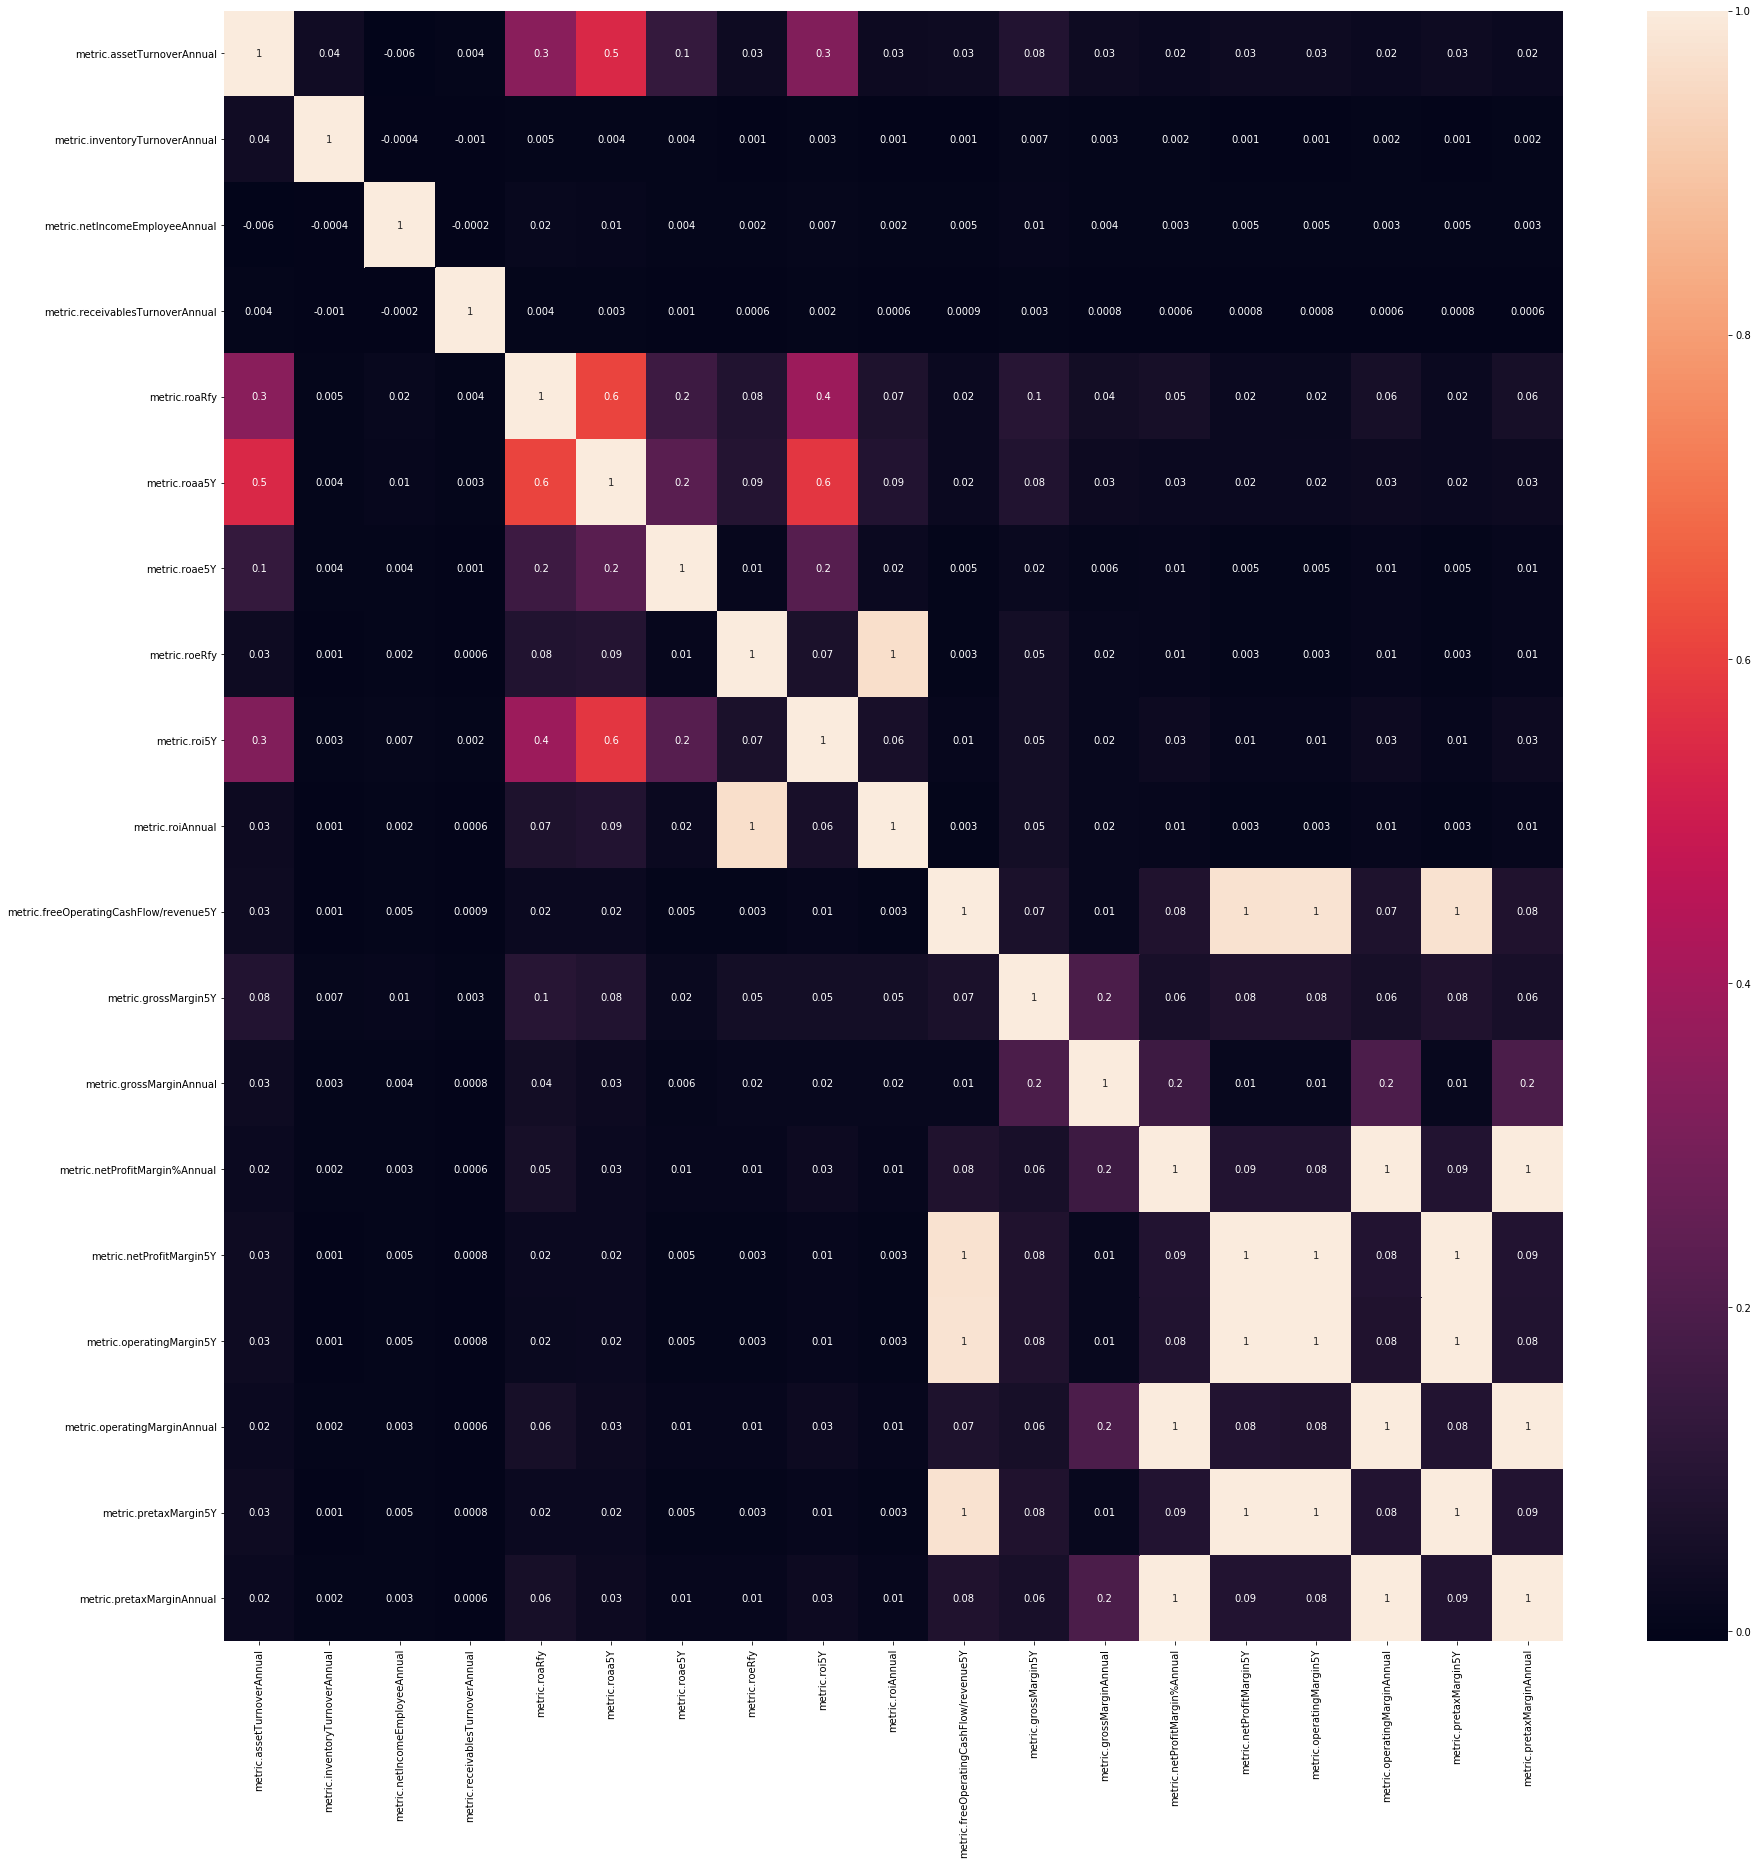

In [188]:
plt.figure(figsize=(30,30))
corr = sns.heatmap(X2.corr(), annot=True, fmt='.1g');

In [189]:
findata3.groupby('Category Name').describe()

metric.assetTurnoverAnnual            \
                                                           count      mean   
Category Name                                                                
Accident & Health Insurance                                 16.0  0.444229   
Advertising Agencies                                        33.0  0.962269   
Aerospace/Defense - Major Diversified                       52.0  0.734615   
Aerospace/Defense Products & Services                       26.0  0.837738   
Agricultural Chemicals                                      27.0  0.645174   
...                                                          ...       ...   
Trucking                                                    23.0  1.244361   
Trucks & Other Vehicles                                     14.0  1.135426   
Waste Management                                            44.0  0.780024   
Water Utilities                                             18.0  0.304647   
Wireless Communications                                    147.0  0.680615   

                                                                              \
                                            std      min       25%       50%   
Category Name                                                                  
Accident & Health Insurance            0.537268  0.07143  0.145410  0.212945   
Advertising Agencies                   0.678523  0.24484  0.536930  0.778770   
Aerospace/Defense - Major Diversified  0.348315  0.05940  0.545975  0.722355   
Aerospace/Defense Products & Services  0.312806  0.02876  0.648895  0.844280   
Agricultural Chemicals                 0.565339  0.00000  0.353780  0.551630   
...                                         ...      ...       ...       ...   
Trucking                               0.779199  0.01101  0.649135  1.165600   
Trucks & Other Vehicles                0.557625  0.08435  0.710212  1.063635   
Waste Management                       0.608561  0.01699  0.318610  0.684525   
Water Utilities                        0.284657  0.00604  0.155133  0.207135   
Wireless Communications                0.593743  0.00737  0.471330  0.526860   

                                                          \
                                            75%      max   
Category Name                                              
Accident & Health Insurance            0.332757  1.65237   
Advertising Agencies                   1.156950  3.32927   
Aerospace/Defense - Major Diversified  0.899690  1.78691   
Aerospace/Defense Products & Services  1.008900  1.34903   
Agricultural Chemicals                 0.755685  2.88662   
...                                         ...      ...   
Trucking                               1.539585  2.91255   
Trucks & Other Vehicles                1.578830  1.88119   
Waste Management                       1.036752  2.67424   
Water Utilities                        0.291587  1.05793   
Wireless Communications                0.631970  5.08124   

                                      metric.inventoryTurnoverAnnual  \
                                                               count   
Category Name                                                          
Accident & Health Insurance                                     16.0   
Advertising Agencies                                            33.0   
Aerospace/Defense - Major Diversified                           52.0   
Aerospace/Defense Products & Services                           26.0   
Agricultural Chemicals                                          27.0   
...                                                              ...   
Trucking                                                        23.0   
Trucks & Other Vehicles                                         14.0   
Waste Management                                                44.0   
Water Utilities                                                 18.0   
Wireless Communications                        

## Iterative Imputer

#### IterativeTest

In [15]:
N_SPLITS = 5
rng = np.random.RandomState(0)

In [16]:
X1 = X.dropna().to_numpy()
X_full = X.to_numpy() #taking continuous subset of variables
y_full = X['metric.assetTurnoverAnnual'].to_numpy()

n_samples, n_features = X_full.shape
REGRESSOR = RandomForestRegressor(random_state=0)


In [120]:
imp_mean = IterativeImputer(estimator = dt, random_state=0)

In [121]:
imp_mean.fit(X_full)

/anaconda3/lib/python3.6/site-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


IterativeImputer(add_indicator=False,
                 estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                                 max_depth=None,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 presort='deprecated',
                                                 random_state=None,
                                                 splitter='best'),
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, ma

In [122]:
comb3 = imp_mean.transform(X_full)

In [123]:
tst1 = pd.DataFrame(comb3, index = [comb1.index, comb1.iloc[:,0]], columns = X.columns)


In [84]:
tst1.reset_index(inplace = True)
tst1.drop(tst1.columns[0], axis = 1, inplace = True)
tst1.head()

# Dimensionality Reduction Using PCA

We are able to reduce the dimensions of the dataset using PCA. From the below 96% of the variance is explained by the first 55 principal components.

In [27]:
sc = StandardScaler()
scaled = sc.fit_transform(X1)

NameError: name 'X1' is not defined

In [89]:
pca = PCA(n_components = None)

In [276]:
XD = pca.fit_transform(scaled)

In [277]:
pca.explained_variance_ratio_

array([1.01057933e-01, 8.40734518e-02, 7.37324017e-02, 6.22388695e-02,
       5.57761824e-02, 5.31182274e-02, 4.68770429e-02, 4.60082676e-02,
       4.00842727e-02, 3.84682107e-02, 3.20686819e-02, 3.04009670e-02,
       2.87129697e-02, 2.77397108e-02, 2.51273366e-02, 2.47071331e-02,
       2.41016325e-02, 2.34763357e-02, 2.22869345e-02, 2.15744500e-02,
       2.01566161e-02, 1.79373119e-02, 1.71827057e-02, 1.65285610e-02,
       1.52753803e-02, 1.45583790e-02, 8.76962511e-03, 6.99071704e-03,
       6.55029652e-03, 4.85714533e-03, 3.06985756e-03, 2.12101316e-03,
       1.67440846e-03, 9.09473212e-04, 8.46768469e-04, 7.89776677e-04,
       7.41953012e-05, 4.41287590e-05, 2.94007161e-05, 2.76538190e-06,
       4.63379371e-07])

In [278]:
len(pca.explained_variance_ratio_)

41

In [279]:
pca_df = pd.DataFrame(XD, columns=[f'PC{x+1}' for x in range((pca.n_components_))])

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41
0,-0.152110,-0.061324,0.047620,0.259454,0.248862,0.033342,0.067489,-0.028979,0.201742,-0.219344,...,-0.204261,-0.141311,0.006484,0.001501,0.029512,-0.001576,0.000181,-0.000272,-0.000019,-0.000140
1,-0.165005,-0.064786,0.123240,0.151703,-0.047352,0.299804,0.085033,-0.232535,-0.151614,-0.060058,...,0.018280,0.018406,0.045572,0.002888,-0.003298,-0.000816,0.003744,-0.000224,-0.000083,-0.000054
2,-0.664502,-1.048743,3.348750,-0.766013,0.223386,-0.055801,0.240095,-0.069715,-1.021228,1.609742,...,-0.096222,-0.161149,0.017480,-0.006695,0.042586,-0.000229,0.003593,0.001411,-0.000164,0.000167
3,-0.168378,-0.096977,0.272624,-0.003950,-0.164774,0.129725,0.079786,-0.320107,-0.354221,0.224518,...,0.076437,-0.013486,-0.019661,0.001224,-0.002444,-0.000980,0.000238,-0.000451,-0.000128,-0.000095
4,-0.323614,-0.407616,1.151730,-0.125067,-0.132234,-0.099762,0.089695,-0.142944,-0.136906,0.239900,...,-0.134603,-0.043983,0.002488,0.002908,0.013949,-0.001173,0.003319,-0.000070,-0.000030,-0.000037


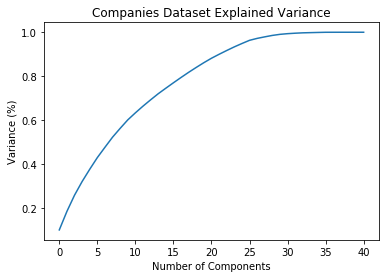

In [280]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Companies Dataset Explained Variance')
plt.show()

In [284]:
pca1 = PCA(n_components = 30)

In [286]:
XD1 = pca1.fit_transform(scaled)
print('30 principal components explain:', pca1.explained_variance_ratio_.sum(), 'of the data variance')


30 principal components explain: 0.9904377489189922 of the data variance


# Clustering

## K-Means on PCA Data

In [311]:
from sklearn.cluster import KMeans
    
pca_kmeans = KMeans(n_clusters = 30, n_init = 10, random_state =0).fit(XD)
pca_kmeans.inertia_

100082.1031376648

In [312]:
pred = pca_kmeans.predict(XD)
df = pd.DataFrame(pred, columns = ['pred'])

In [313]:
df.pred.value_counts()

13    5249
29    2226
0      975
22     189
23     123
10      15
28      14
16       5
12       5
14       5
25       3
8        2
27       2
15       2
6        1
24       1
1        1
9        1
17       1
2        1
3        1
18       1
26       1
11       1
4        1
20       1
5        1
7        1
21       1
19       1
Name: pred, dtype: int64

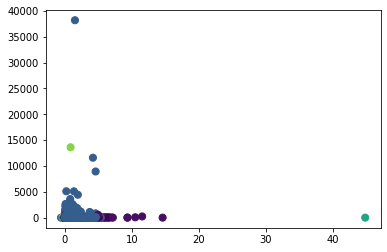

In [314]:
km = KMeans(n_clusters=30)
km.fit(scaled)
predicted = km.predict(XD)
plt.scatter(X1.iloc[:, 0], 
            X1.iloc[:, 1], c=predicted, s=50, cmap='viridis');

## K-Means on Original Data

In [306]:
from sklearn.cluster import KMeans
    


100082.10313766473

In [309]:
pred = std_km.predict(scaled)
df = pd.DataFrame(pred, columns = ['pred'])
df.pred.value_counts()

13    5249
29    2226
0      975
22     189
23     123
10      15
28      14
16       5
12       5
14       5
25       3
8        2
27       2
15       2
6        1
24       1
1        1
9        1
17       1
2        1
3        1
18       1
26       1
11       1
4        1
20       1
5        1
7        1
21       1
19       1
Name: pred, dtype: int64

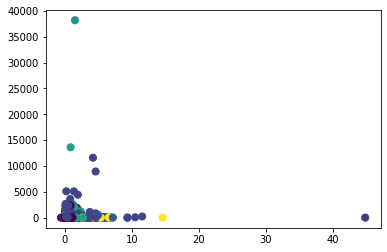

In [315]:
km = KMeans(n_clusters=30)
km.fit(scaled)
predicted = km.predict(scaled)
plt.scatter(X1.iloc[:, 0], 
            X1.iloc[:, 1], c=predicted, s=50, cmap='viridis');

### Elbow Method - Finding the optimal number of clusters

The below method suggests a high number of clusters ~30 required to establish clear separation. We use cosine distance which works better than Euclidian distance in high dimensional datasets. 

Text(0.5, 1.0, 'Inertia of Cosine k-Means versus number of clusters')

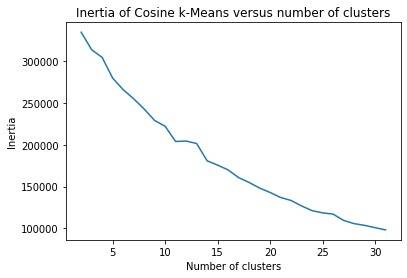

In [292]:
scores = [KMeans(n_clusters=i+2).fit(scaled).inertia_ for i in range(30)]
sns.lineplot(np.arange(2, 32), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")

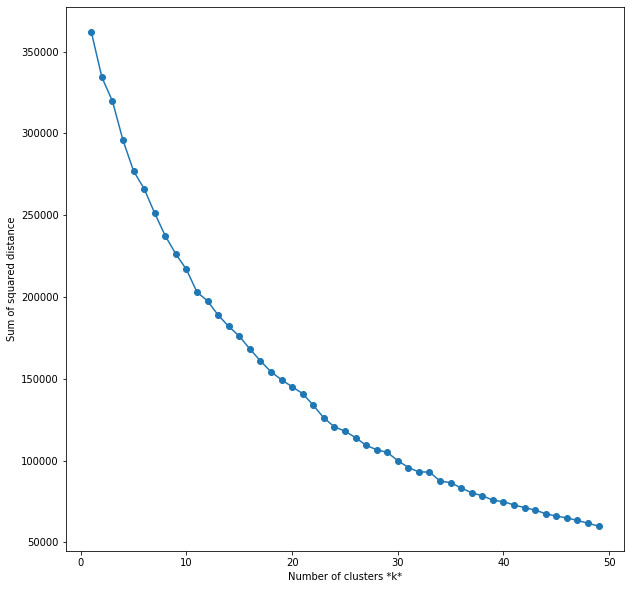

In [293]:
sse = []
list_k = list(range(1, 50))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(scaled)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(10, 10))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

## Silhouette Method - Evaluation

In [118]:
from sklearn.metrics import silhouette_score

In [301]:
kmeans = KMeans(n_clusters =30).fit(XD)
normalized_km = KMeans(n_clusters =30).fit(XD)
min_samples = df.shape[1]+1
dbscan = DBSCAN(eps = 3.5, min_samples = 30).fit(XD)

In [303]:
print('kmeans: {}'.format(silhouette_score(XD, kmeans.labels_, 
                                           metric='euclidean')))
print('Cosine kmeans:{}'.format(silhouette_score(scaled,
                                          kmeans.labels_,
                                          metric='cosine')))
print('DBSCAN: {}'.format(silhouette_score(XD, kmeans.labels_, 
                                           metric='cosine')))

kmeans: 0.2017032540158418
Cosine kmeans:-0.14678999331092163
DBSCAN: -0.14678999331092163


### Bayesian Gaussian Mixture Models

In [17]:
from sklearn.mixture import BayesianGaussianMixture

In [21]:
bgm = BayesianGaussianMixture(n_components = 100, n_init = 10)

In [22]:
bgm.fit(comb2)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=100, n_init=10,
                        random_state=None, reg_covar=1e-06, tol=0.001,
                        verbose=0, verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [23]:
np.round(bgm.weights_, 2)

array([0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.07, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.62, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.09, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  ])

# Alternative Dataset

# DataSet Construction

In [28]:
findata1 = findata[['symbol','metric.netIncomeEmployeeAnnual', 'metric.revenueEmployeeAnnual','metric.receivablesTurnoverAnnual','metric.freeOperatingCashFlow/revenue5Y',
"metric.freeOperatingCashFlow/revenueTTM", 'metric.grossMargin5Y', 'metric.grossMarginAnnual',
'metric.netProfitMargin%Annual',
'metric.netProfitMargin5Y',
'metric.dividendGrowthRate5Y',
'metric.focfCagr5Y',
'metric.revenueGrowth5Y',
'metric.totalDebtCagr5Y',
'metric.netDebtAnnual',
'metric.peNormalizedAnnual',
'metric.pfcfShareAnnual',
'metric.currentEv/freeCashFlowAnnual',
'metric.freeCashFlowAnnual',
'metric.longTermDebt/equityAnnual',
'metric.netInterestCoverageAnnual',
'metric.payoutRatioAnnual',
'metric.quickRatioAnnual',
'metric.totalDebt/totalEquityAnnual',
'metric.dividendYield5Y',
'metric.dividendYieldIndicatedAnnual',
'metric.capitalSpendingGrowth5Y',
'metric.inventoryTurnoverAnnual',
]]

findata1.shape

(8831, 28)

In [29]:
Xalt = findata1.iloc[:,1:28]

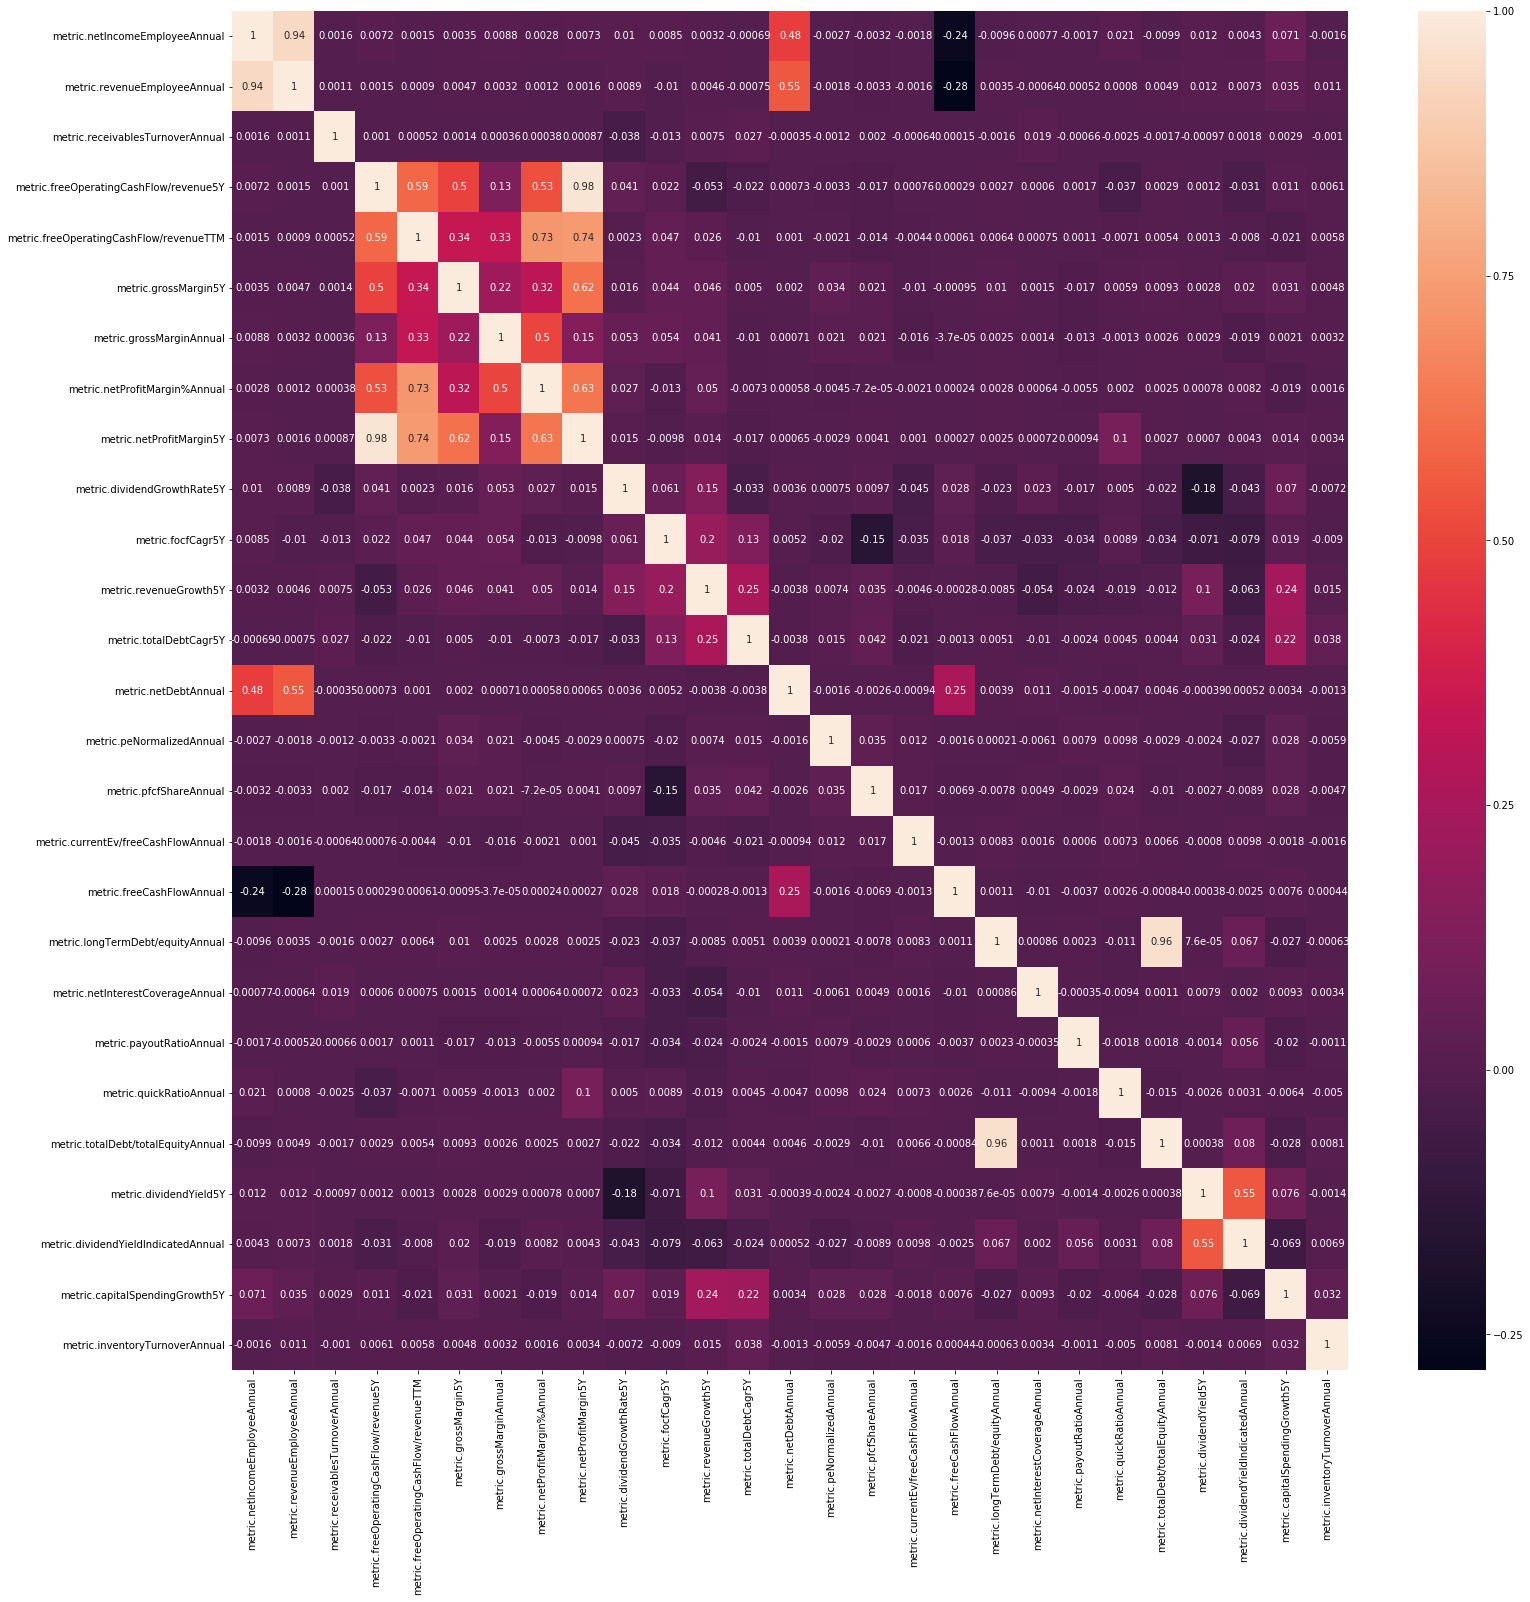

In [30]:
plt.figure(figsize = [25,25])
corr = sns.heatmap(Xalt.corr(), annot=True);

## KNN Imputer

In [14]:
imputer = KNNImputer(n_neighbors = 20)

In [15]:
complete1 = imputer.fit_transform(Xalt)

In [16]:
df = pd.DataFrame(complete1, index = [findata1.index, findata1.iloc[:,0]], columns = Xalt.columns).reset_index()

In [17]:
df.drop(columns = ['level_0'], inplace = True)

In [18]:
df

,symbol,metric.netIncomeEmployeeAnnual,metric.revenueEmployeeAnnual,metric.receivablesTurnoverAnnual,metric.freeOperatingCashFlow/revenue5Y,metric.freeOperatingCashFlow/revenueTTM,metric.grossMargin5Y,metric.grossMarginAnnual,metric.netProfitMargin%Annual,metric.netProfitMargin5Y,...,metric.freeCashFlowAnnual,metric.longTermDebt/equityAnnual,metric.netInterestCoverageAnnual,metric.payoutRatioAnnual,metric.quickRatioAnnual,metric.totalDebt/totalEquityAnnual,metric.dividendYield5Y,metric.dividendYieldIndicatedAnnual,metric.capitalSpendingGrowth5Y,metric.inventoryTurnoverAnnual
0,AAPL,410825.300000,1934379.000,11.284440,19.40911,18.63398,38.718250,37.817770,21.23809,21.89832,...,44777.00000,101.457600,21.364915,25.570070,1.501290,119.404800,1.486500,1.275840,1.352890,40.134460
1,BAC,133155.300000,442932.000,7.973046,29.93606,61.20183,53.779052,55.803548,30.06225,25.11008,...,55843.00000,81.795250,23.594304,23.640280,0.544362,161.458000,1.589900,3.594610,11.858569,9.623854
2,AMZN,16052.580000,388131.400,15.074940,6.57306,7.71885,38.289440,40.990010,4.13586,2.87305,...,21653.00000,65.273930,18.933590,39.613199,0.863630,67.379950,2.774091,5.604027,28.074190,8.788510
3,T,58268.480000,705031.100,6.973920,5.05381,7.91697,53.188140,53.562780,8.26467,8.60255,...,14345.00000,82.134500,3.773710,108.115100,0.753100,88.560480,5.342350,7.574650,-1.722560,29.863710
4,GOOGL,315551.100000,1487178.000,7.012260,20.90443,19.13541,58.188350,55.580540,21.21811,21.46707,...,30972.00000,2.260700,22.797158,0.000000,3.351960,2.260700,3.017829,5.483896,16.413080,68.277300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,TEXF.BR,-251954.217000,263252.880,22.760760,4.94381,25.43451,47.208966,48.544562,49.75335,40.47186,...,7.30200,7.820562,51.533630,26.649310,0.830620,8.766772,1.846710,2.563280,-7.603030,22.795993
8827,TRB.L,-284442.197845,322311.800,5.642860,1.82452,4.26416,44.941730,50.098450,-3.78852,-9.72124,...,3.33500,10.492030,67.748030,1102.903429,2.321427,13.471060,1.291330,2.123890,1.130880,41.726025
8828,ZO1.DE,-17904.200000,2260676.000,40.701720,1.02939,1.63264,27.269160,29.119890,-0.79198,0.12667,...,24.87641,61.339690,-6.080280,54.426176,0.707650,81.612810,2.545007,3.007997,-7.135260,9.588630
8829,TRY.AX,-937872.754450,378203.079,114.245900,-19.62623,-0.35878,-5.924430,-0.399530,-44.23042,-59.94664,...,9.81200,0.128460,-4.777970,37.573755,0.311520,8.128660,3.800539,8.609218,-25.616750,8.136950


## Scaling Data prior to Modelling

In [31]:
sc = StandardScaler()
complete1_scaled = sc.fit_transform(complete1)
pca_alt = PCA(n_components = None)

## PCA

In [32]:
pca_complete1_scaled = pca_alt.fit_transform(complete1_scaled)

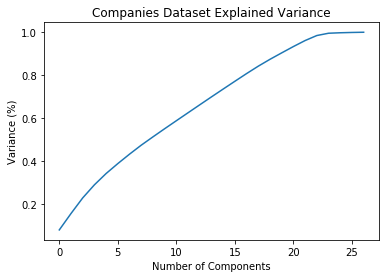

In [34]:
plt.figure()
plt.plot(np.cumsum(pca_alt.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Companies Dataset Explained Variance')
plt.show()

In [35]:
pca_alt = PCA(n_components = 23)

In [36]:
alt30 = pca_alt.fit_transform(complete1_scaled)
print('23 principal components explain:', pca_alt.explained_variance_ratio_.sum(), 'of the data variance')

23 principal components explain: 0.9846834278820833 of the data variance


In [37]:
alt_df = pd.DataFrame(alt30, columns=[f'PC{x+1}' for x in range((pca_alt.n_components_))])

alt_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,-0.112082,-0.077489,0.007571,-0.021085,0.112996,0.285396,-0.238318,-0.090858,0.445232,-0.026238,...,-0.281281,0.015653,0.071321,0.113406,-0.294252,-0.113723,0.235337,-0.326205,-0.443511,-0.199074
1,-0.189786,-0.002613,-0.014719,-0.045640,0.418955,0.808834,-0.994191,-0.208199,1.241294,0.236659,...,-0.466093,0.141885,0.052722,0.872656,0.979997,-0.176679,0.140070,-0.286446,-0.153069,0.009557
2,-0.165146,0.057026,-0.194710,-0.126403,1.758026,0.490340,-1.387193,0.341800,-0.043093,0.230365,...,0.164122,0.147137,-0.198597,0.398539,0.790877,-0.798401,0.038738,0.640818,1.247436,0.036364
3,-0.122804,0.053316,-0.127770,-0.061128,1.266732,0.681929,-2.078002,0.478857,-1.263063,0.202289,...,0.623319,0.141677,-0.264279,-0.167270,0.311153,-1.357951,0.117612,1.268628,2.101139,0.091451
4,-0.084664,-0.042201,-0.259081,-0.065819,0.344208,0.189369,-0.402301,-0.000550,0.053034,0.224709,...,0.208002,-0.126824,0.037008,0.111224,0.048022,0.224284,-0.176283,0.420979,0.254804,-0.159979


## KMeans

### without PCA Data

In [38]:
number_clusters = 100

In [39]:
alt_km = KMeans(n_clusters = number_clusters, n_init = 10, random_state =0).fit(complete1_scaled)
alt_km.inertia_

16861.924673655245

In [40]:
pred_alt = alt_km.predict(complete1_scaled)
alt_df_2 = pd.DataFrame(pred_alt, columns = ['company cluster'])
alt_df_2.reset_index(inplace = True)

In [41]:
alt_df_2['companies'] = 1

In [42]:
clusters = pd.pivot_table(alt_df_2,  values = 'companies', index = 'company cluster', aggfunc = np.sum)
clusters = clusters.reset_index().sort_values(by = 'companies', ascending = False)

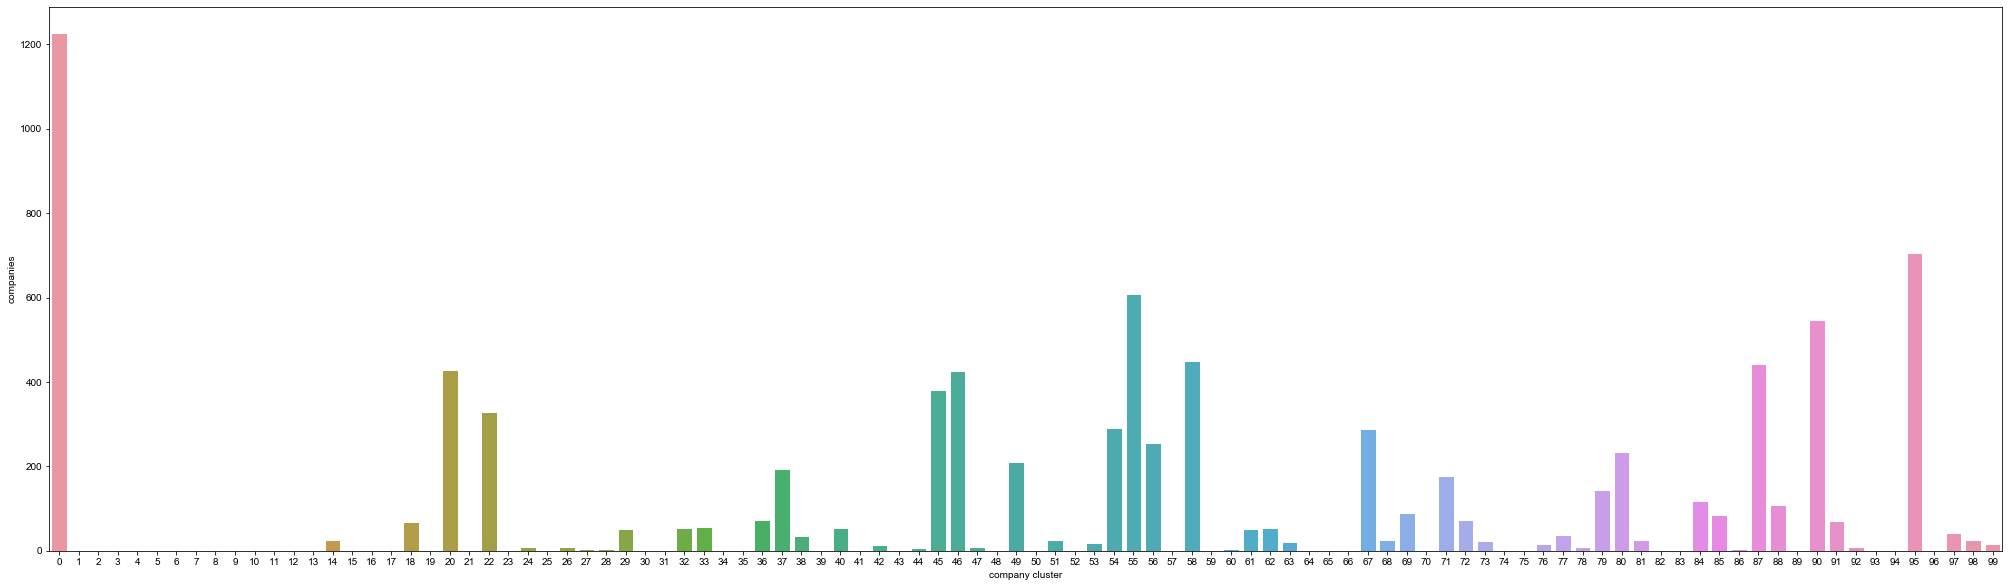

In [43]:
f, ax = plt.subplots(figsize=(35, 10))
sns.set(style = "darkgrid")
sns.barplot(x='company cluster', y = 'companies', data = clusters)

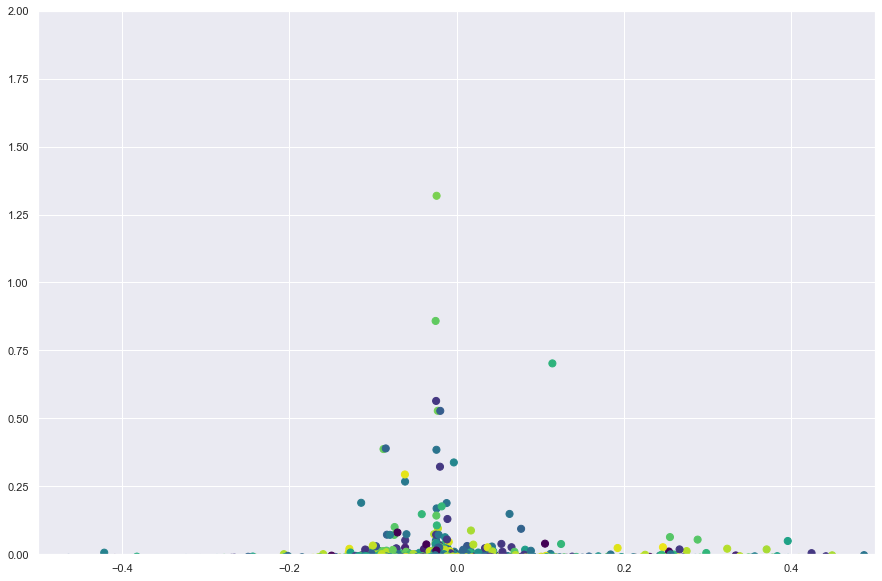

In [44]:
plt.figure(figsize = [15,10])
plt.axis([-0.5,0.5,0,2])

km_alt = KMeans(n_clusters=number_clusters)
km_alt.fit(complete1_scaled)
predicted_alt = km_alt.predict(complete1_scaled)
plt.scatter(complete1_scaled[:, 0], 
            complete1_scaled[:, 2], c=predicted_alt, s=50, cmap='viridis');

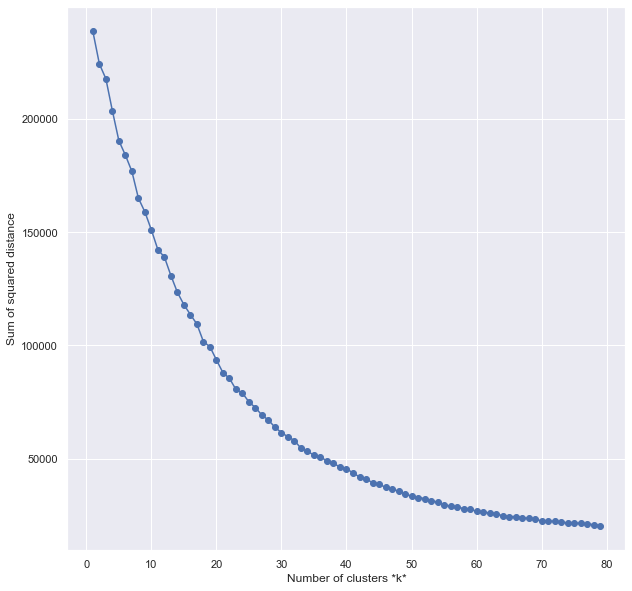

In [73]:
sse = []
list_k = list(range(1, 80))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(complete1_scaled)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(10, 10))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

### 3D Plot

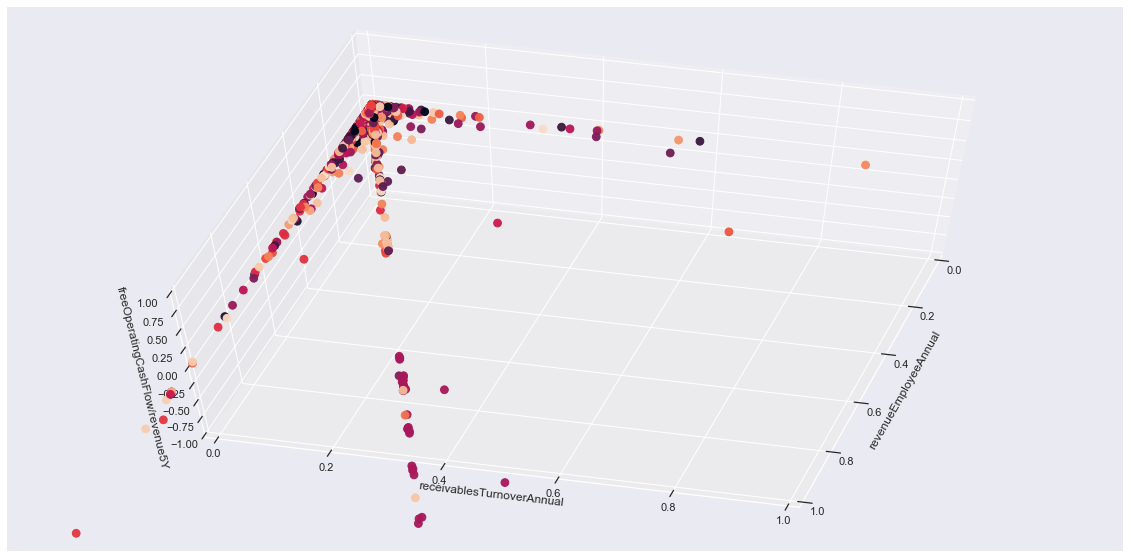

In [58]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('revenueEmployeeAnnual')
ax.set_ylabel('receivablesTurnoverAnnual')
ax.set_zlabel('freeOperatingCashFlow/revenue5Y')
ax.scatter(complete1_scaled[:,1], complete1_scaled[:,2], complete1_scaled[:,3], c=predicted_alt , s=60)
ax.set_xlim3d(0, 1)
ax.set_ylim3d(0,1)
ax.set_zlim3d(-1,1)
ax.view_init(60, 15)
plt.show()

In [52]:
complete1_scaled[0]

array([ 0.00328367, -0.01727332, -0.0134903 ,  0.05196993,  0.0415202 ,
        0.10758619,  0.03244486,  0.02822768,  0.04824225,  0.44562821,
       -0.32965709, -0.06723979,  0.27048882, -0.01870399, -0.07072394,
       -0.18872415, -0.0426315 ,  0.27189963,  0.03281247,  0.01996814,
       -0.12225377, -0.10090881,  0.00608418, -0.02238461, -0.65084078,
       -0.19449759, -0.00605774])

In [103]:
silhouette_score(complete1_scaled, predicted_alt)

0.10604321478925068

### with PCA Data

In [45]:
pca_km_alt = KMeans(n_clusters = number_clusters, random_state = 0)

In [46]:
pca_km_alt.fit(alt30)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [47]:
predicted_alt_pca = pca_km_alt.predict(alt30)

In [48]:
predicted_alt_pca

array([55, 48, 34, ..., 69, 84, 99], dtype=int32)

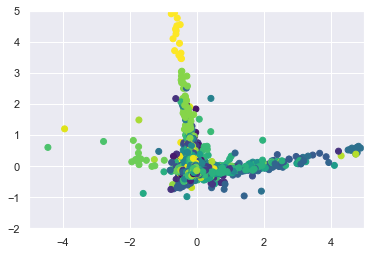

In [109]:
plt.axis([-5,5,-2,5])
plt.scatter(alt30[:,0], alt30[:,2], c = predicted_alt_pca, cmap = 'viridis')

In [101]:
silhouette_score(alt30, predicted_alt_pca)

0.11526097927210716

In [134]:
import plotly.express as px

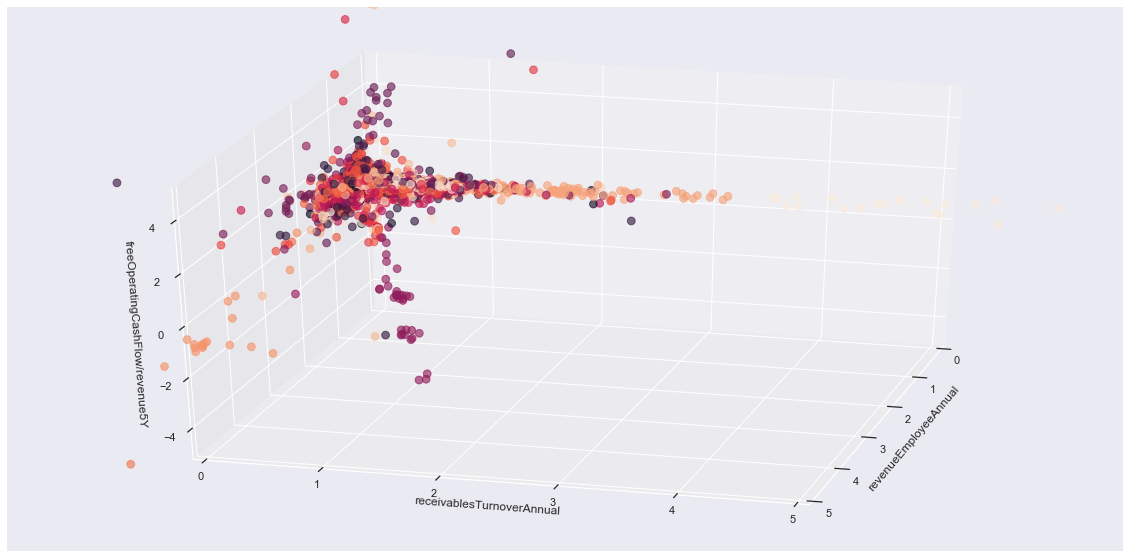

In [51]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('revenueEmployeeAnnual')
ax.set_ylabel('receivablesTurnoverAnnual')
ax.set_zlabel('freeOperatingCashFlow/revenue5Y')
ax.scatter(alt30[:,1], alt30[:,2], alt30[:,3], c=predicted_alt_pca , s=60)
ax.set_xlim3d(0, 5)
ax.set_ylim3d(0,5)
ax.set_zlim3d(-5,5)
ax.view_init(30, 15)
plt.show()

## Link Clusters to DataFrame / Features

In [138]:
findata_w_clusters = pd.merge(df, alt_df_2, left_index = True, right_index = True)

In [140]:
findata_w_clusters.drop(columns = ['index', 'companies'], inplace = True)

In [141]:
findata_w_clusters

,symbol,metric.netIncomeEmployeeAnnual,metric.revenueEmployeeAnnual,metric.receivablesTurnoverAnnual,metric.freeOperatingCashFlow/revenue5Y,metric.freeOperatingCashFlow/revenueTTM,metric.grossMargin5Y,metric.grossMarginAnnual,metric.netProfitMargin%Annual,metric.netProfitMargin5Y,...,metric.longTermDebt/equityAnnual,metric.netInterestCoverageAnnual,metric.payoutRatioAnnual,metric.quickRatioAnnual,metric.totalDebt/totalEquityAnnual,metric.dividendYield5Y,metric.dividendYieldIndicatedAnnual,metric.capitalSpendingGrowth5Y,metric.inventoryTurnoverAnnual,company cluster
0,AAPL,410825.300000,1934379.000,11.284440,19.40911,18.63398,38.718250,37.817770,21.23809,21.89832,...,101.457600,21.364915,25.570070,1.501290,119.404800,1.486500,1.275840,1.352890,40.134460,55
1,BAC,133155.300000,442932.000,7.973046,29.93606,61.20183,53.779052,55.803548,30.06225,25.11008,...,81.795250,23.594304,23.640280,0.544362,161.458000,1.589900,3.594610,11.858569,9.623854,67
2,AMZN,16052.580000,388131.400,15.074940,6.57306,7.71885,38.289440,40.990010,4.13586,2.87305,...,65.273930,18.933590,39.613199,0.863630,67.379950,2.774091,5.604027,28.074190,8.788510,71
3,T,58268.480000,705031.100,6.973920,5.05381,7.91697,53.188140,53.562780,8.26467,8.60255,...,82.134500,3.773710,108.115100,0.753100,88.560480,5.342350,7.574650,-1.722560,29.863710,71
4,GOOGL,315551.100000,1487178.000,7.012260,20.90443,19.13541,58.188350,55.580540,21.21811,21.46707,...,2.260700,22.797158,0.000000,3.351960,2.260700,3.017829,5.483896,16.413080,68.277300,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8826,TEXF.BR,-251954.217000,263252.880,22.760760,4.94381,25.43451,47.208966,48.544562,49.75335,40.47186,...,7.820562,51.533630,26.649310,0.830620,8.766772,1.846710,2.563280,-7.603030,22.795993,55
8827,TRB.L,-284442.197845,322311.800,5.642860,1.82452,4.26416,44.941730,50.098450,-3.78852,-9.72124,...,10.492030,67.748030,1102.903429,2.321427,13.471060,1.291330,2.123890,1.130880,41.726025,88
8828,ZO1.DE,-17904.200000,2260676.000,40.701720,1.02939,1.63264,27.269160,29.119890,-0.79198,0.12667,...,61.339690,-6.080280,54.426176,0.707650,81.612810,2.545007,3.007997,-7.135260,9.588630,0
8829,TRY.AX,-937872.754450,378203.079,114.245900,-19.62623,-0.35878,-5.924430,-0.399530,-44.23042,-59.94664,...,0.128460,-4.777970,37.573755,0.311520,8.128660,3.800539,8.609218,-25.616750,8.136950,22


In [144]:
cl1 = findata_w_clusters.loc[findata_w_clusters['company cluster'] == 55]

In [155]:
cl1 = cl1.merge(tickers_final, left_on = 'symbol', right_on = 'Ticker')

In [157]:
cl1.describe()

,metric.netIncomeEmployeeAnnual,metric.revenueEmployeeAnnual,metric.receivablesTurnoverAnnual,metric.freeOperatingCashFlow/revenue5Y,metric.freeOperatingCashFlow/revenueTTM,metric.grossMargin5Y,metric.grossMarginAnnual,metric.netProfitMargin%Annual,metric.netProfitMargin5Y,metric.dividendGrowthRate5Y,...,metric.longTermDebt/equityAnnual,metric.netInterestCoverageAnnual,metric.payoutRatioAnnual,metric.quickRatioAnnual,metric.totalDebt/totalEquityAnnual,metric.dividendYield5Y,metric.dividendYieldIndicatedAnnual,metric.capitalSpendingGrowth5Y,metric.inventoryTurnoverAnnual,company cluster
count,5.990000e+02,5.990000e+02,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,...,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.0
mean,4.062444e+05,1.501909e+06,86.031238,-140.062142,-23.407705,46.563112,47.075934,4.640962,-298.161918,15.029280,...,61.570613,2.073577,48.716513,1.440072,81.246690,2.344735,3.816645,11.623990,25.179320,55.0
std,2.802451e+06,5.404971e+06,1439.019460,2968.456401,313.925507,20.855186,21.892628,249.529156,7417.784793,4.720703,...,82.329937,218.296765,49.711602,1.807611,109.364665,1.344416,2.352514,12.605792,55.911395,0.0
min,-1.744400e+06,2.117062e+04,0.133940,-72316.587341,-4898.922713,1.754960,1.719470,-5612.900118,-181427.300253,6.265850,...,0.000000,-798.790178,0.000000,-31.966400,0.000000,0.000000,0.158730,-33.865300,0.001640,55.0
25%,1.177855e+04,2.542112e+05,5.412975,-0.460345,-1.397790,32.400240,31.951115,5.559280,5.086320,11.198990,...,9.111575,5.953757,24.950845,0.836753,18.726180,1.356850,1.959740,4.901600,3.709315,55.0
50%,4.790349e+04,4.692951e+05,8.039060,3.866810,5.089210,45.945711,46.676780,10.837820,10.394140,14.297793,...,36.131070,18.192510,37.584920,1.144420,46.867740,2.134000,3.440737,10.712160,8.139013,55.0
75%,1.386624e+05,1.211936e+06,14.418131,10.097355,12.780830,57.312250,59.002920,21.424415,20.403990,18.662246,...,77.689495,26.546930,55.628520,1.765747,99.632550,3.029462,5.235029,18.319780,22.131269,55.0
max,3.255285e+07,7.296857e+07,35116.426330,150.924000,257.869500,99.293540,124.359900,613.856167,693.500822,27.215380,...,730.553300,2961.800000,535.626500,8.858204,1144.725000,8.351730,13.869630,54.870550,699.482500,55.0


In [158]:
cl2 = findata_w_clusters.loc[findata_w_clusters['company cluster'] == 80]
cl2 = cl2.merge(tickers_final, left_on = 'symbol', right_on = 'Ticker')

In [160]:
cl2.describe()

,metric.netIncomeEmployeeAnnual,metric.revenueEmployeeAnnual,metric.receivablesTurnoverAnnual,metric.freeOperatingCashFlow/revenue5Y,metric.freeOperatingCashFlow/revenueTTM,metric.grossMargin5Y,metric.grossMarginAnnual,metric.netProfitMargin%Annual,metric.netProfitMargin5Y,metric.dividendGrowthRate5Y,...,metric.longTermDebt/equityAnnual,metric.netInterestCoverageAnnual,metric.payoutRatioAnnual,metric.quickRatioAnnual,metric.totalDebt/totalEquityAnnual,metric.dividendYield5Y,metric.dividendYieldIndicatedAnnual,metric.capitalSpendingGrowth5Y,metric.inventoryTurnoverAnnual,company cluster
count,2.310000e+02,2.310000e+02,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,...,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.0
mean,1.153351e+05,1.237933e+06,24.804325,-2.355856,11.093003,42.618148,39.138583,17.276008,13.651299,-21.400876,...,66.852484,-14.094332,80.359337,1.383858,93.855254,3.925436,4.924337,6.789231,24.481761,80.0
std,8.463160e+05,2.588565e+06,167.259749,60.138782,260.367062,22.938135,51.203644,260.912255,55.468817,7.012022,...,89.309064,190.325956,122.739012,1.014725,129.916459,2.289121,3.485981,19.440425,65.944250,0.0
min,-2.437104e+06,2.564890e+04,0.255920,-280.131600,-785.694700,5.199840,-644.578300,-756.626500,-27.432440,-38.264180,...,0.000000,-776.721603,0.000000,0.117040,0.000000,0.202930,0.139130,-63.100080,0.070250,80.0
25%,1.557374e+02,2.703487e+05,4.367440,-3.807950,-2.175805,23.571310,21.512130,0.964320,2.230475,-27.263825,...,13.618755,2.198525,28.894415,0.763595,27.055080,2.334090,2.143020,-1.512824,3.270485,80.0
50%,1.786328e+04,5.120228e+05,6.512610,0.573840,2.727840,41.334922,40.300400,4.961870,7.140820,-20.629930,...,41.344320,7.250750,50.141300,1.021041,57.406940,3.410860,4.117650,6.436663,7.661890,80.0
75%,6.786989e+04,1.154322e+06,11.950405,3.477675,8.501145,54.872230,57.007845,10.839390,13.516660,-15.656720,...,82.342260,21.615283,74.327008,1.691269,112.771900,5.110200,6.929685,15.200761,20.482072,80.0
max,9.717354e+06,2.554914e+07,2512.396000,775.776700,3839.756000,100.716300,100.989100,3856.027000,815.477700,-9.485915,...,660.253000,1405.382232,943.051300,8.159440,1031.239000,12.860890,18.604650,74.425350,789.357100,80.0


## DBSCAN - Density Based Spatial CLustering of Applications with Noise
    - Reduce influence of outliers / noise in the clusters

In [176]:
from sklearn.cluster import DBSCAN
import math

In [189]:
dbscan = DBSCAN(eps = 0.05, min_samples = 5)

In [190]:
pred = dbscan.fit_predict(complete1_scaled)

In [191]:
len(dbscan.core_sample_indices_)

256

In [172]:
dbscan.core_sample_indices_

array([   0,    1,    4, ..., 8826, 8828, 8829])

In [177]:
def calculate_kn_distance(X,k):

    kn_distance = []
    for i in range(len(X)):
        eucl_dist = []
        for j in range(len(X)):
            eucl_dist.append(
                math.sqrt(
                    ((X[i,0] - X[j,0]) ** 2) +
                    ((X[i,1] - X[j,1]) ** 2)))

        eucl_dist.sort()
        kn_distance.append(eucl_dist[k])

    return kn_distance

In [182]:
eps_dist = calculate_kn_distance(complete1_scaled,100)


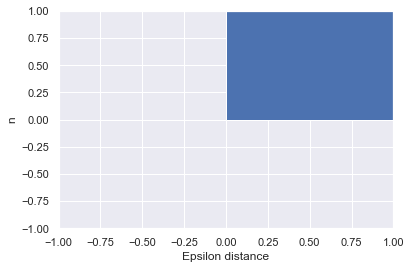

In [181]:
plt.axis([-1,1,-1,1])
plt.hist(eps_dist,bins=30)
plt.ylabel('n');
plt.xlabel('Epsilon distance');

### KNN Classifier to predict clusters

In [193]:
from sklearn.neighbors import KNeighborsClassifier

In [195]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [196]:
knn.predict(complete1_scaled)

array([7, 2, 1, ..., 7, 6, 1])

In [199]:
ts =knn.predict_proba(complete1_scaled)

In [200]:
ts.shape

(8831, 8)

### Agglomerative Clustering / AGNES


In [52]:
from sklearn.cluster import AgglomerativeClustering

In [68]:
clustering_alt = AgglomerativeClustering().fit_predict(complete1_scaled)

In [64]:
clustering_alt.sum()

1

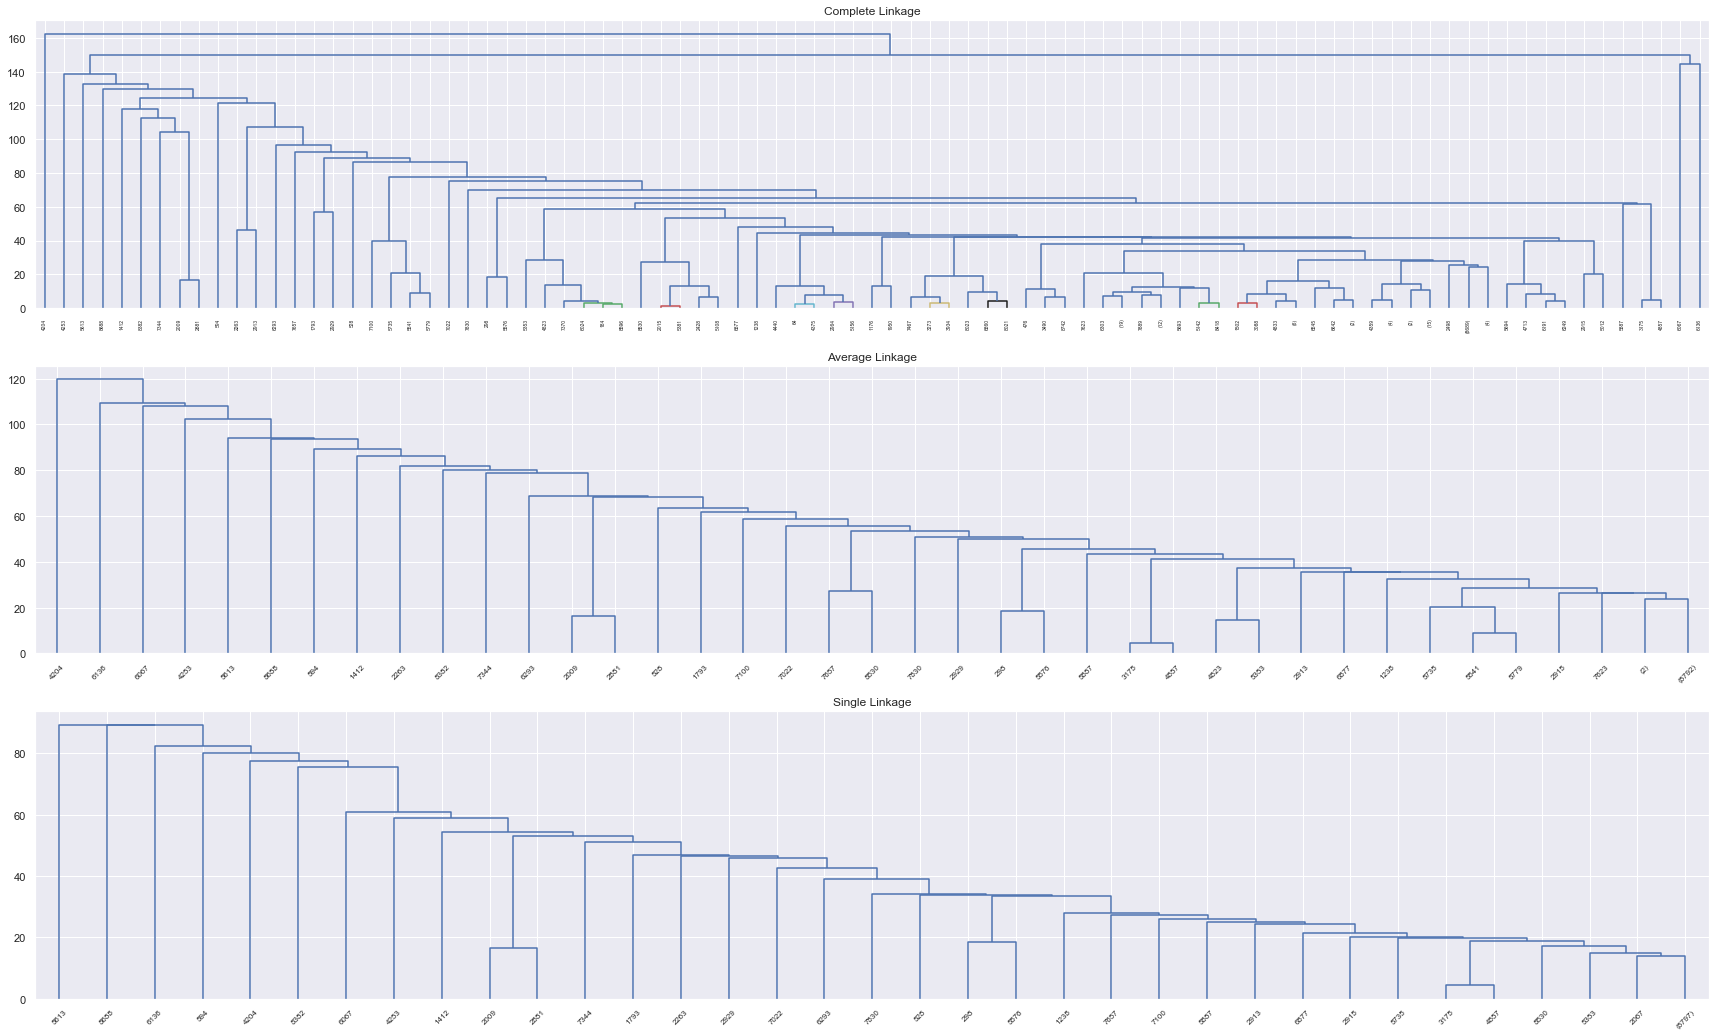

In [72]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(30,18))

# This time we define linkage through functions instead of an argument
for linkage, cluster, ax in zip([shc.complete(complete1_scaled),
                                 shc.average(complete1_scaled),
                                 shc.single(complete1_scaled)],
                                ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    shc.dendrogram(linkage, ax=ax, color_threshold=4, truncate_mode='level',
                  )

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');